## Homework 1: Time Series Plots
### Author: Brooke Grazda
### Date: 4/21/2025
[GitHub Repository](https://github.com/bgrazda/climate-modeling-hw1.git)

#### Import Packages

In [143]:
# Import necessary packages
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cftime
import intake
import s3fs

#### Load and Query CMIP6 Catalog

In [144]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

In [145]:
catalog

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,709
grid_label,10
zstore,522217
dcpp_init_year,60


Specify search items
## Locate monthly data for a historical simulation run with any two CMIP6 models

In [146]:
# Specify search terms to query catalog for CanESM5 data
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id = ['CanESM5']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id = 'r10i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon' 

# variable_id: which climate variable do you want? Here we want precip
variable_id = 'pr'

In [147]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,ScenarioMIP,CCCma,CanESM5,ssp585,r10i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
2,ScenarioMIP,CCCma,CanESM5,ssp370,r10i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
3,ScenarioMIP,CCCma,CanESM5,ssp126,r10i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
4,ScenarioMIP,CCCma,CanESM5,ssp245,r10i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


In [148]:
# Read in the historical data file
hist_data = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})

# Read in the SSP370 data file
ssp370_data = xr.open_zarr(res.df['zstore'][2], storage_options={'anon': True})

### Plot a Time Series

In [149]:
# Concatenate historical and future projection data
canesm5_data = xr.concat([hist_data, ssp370_data], dim="time")

In [150]:
# Convert time to datetime64 format
time = canesm5_data.time.astype('datetime64[ns]')

In [151]:
# Store Precipitation xarray
pr = canesm5_data['pr']
print(pr)

<xarray.DataArray 'pr' (time: 3012, lat: 64, lon: 128)>
dask.array<concatenate, shape=(3012, 64, 128), dtype=float32, chunksize=(600, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        includes both liquid and solid phases
    history:        2019-04-30T17:40:03Z altered by CMOR: Reordered dimension...
    long_name:      Precipitation
    original_name:  PCP
    standard_name:  precipitation_flux
    units:          kg m-2 s-1


In [152]:
# Define min/max bounds for region of interest (Japan)
lat_min, lat_max = 20.2145811, 45.7112046
lon_min, lon_max = 45.7112046, 154.205541

## Select surface temperature for 2nd model

In [153]:
ts = 'ts'

# Search through catalog, store results in "sst_model" variable
st_model = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=ts)

# Display data frame associated with results
display(st_model.df)

# Read in the historical data file
hist_data_sst = xr.open_zarr(sst_model.df['zstore'][0], storage_options={'anon': True})

# Read in the SSP370 data file
ssp370_data_sst = xr.open_zarr(sst_model.df['zstore'][2], storage_options={'anon': True})

# Concatenate historical and future projection data
canesm5_sst_data = xr.concat([hist_data_sst, ssp370_data_sst], dim="time")

# Convert time to datetime64 format
time = canesm5_sst_data.time.astype('datetime64[ns]')

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,ts,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,ScenarioMIP,CCCma,CanESM5,ssp585,r10i1p1f1,Amon,ts,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
2,ScenarioMIP,CCCma,CanESM5,ssp370,r10i1p1f1,Amon,ts,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
3,ScenarioMIP,CCCma,CanESM5,ssp126,r10i1p1f1,Amon,ts,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
4,ScenarioMIP,CCCma,CanESM5,ssp245,r10i1p1f1,Amon,ts,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


In [154]:
# Store Surface Temperature xarray
ts = canesm5_sst_data['ts']
print(ts)

<xarray.DataArray 'ts' (time: 3012, lat: 64, lon: 128)>
dask.array<concatenate, shape=(3012, 64, 128), dtype=float32, chunksize=(600, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        GT+273.16, CMIP_table_comment: Temperature of the lower b...
    history:        degctok 2019-04-30T17:40:14Z altered by CMOR: Reordered d...
    long_name:      Surface Temperature
    original_name:  GT
    standard_name:  surface_temperature
    units:          K


## Japanese Climate
Japanese Climate ranges from sub arctic to sub tropical. Northern Japan has warm summers and cold winters with heavy snow in the mountainous areas closest to the Sea of Japan. Eastern Japan is very similar to the northern part of the country, with even colder winters. Western Japan has moderate winters and very hot and humid summers reaching temperatures of 35 degrees celsius and above. With climate change, these seasons are likely subject to be more highly variable with more or less precipitation. The future climate model predicts an increase in overall precipitation in the entire country. 

[Source](https://ds.data.jma.go.jp/tcc/tcc/products/japan/index.html)

In [155]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
pr_cr_lat = (canesm5_data.lat >= lat_min) & (canesm5_data.lat <= lat_max)
pr_cr_lon = (canesm5_data.lon >= lon_min) & (canesm5_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
pr_cr = canesm5_data.where(pr_cr_lat & pr_cr_lon, drop=True)

# Average over lat, lon dimensions to get a time series
pr_cr = pr_cr.mean(dim=["lat", "lon"])

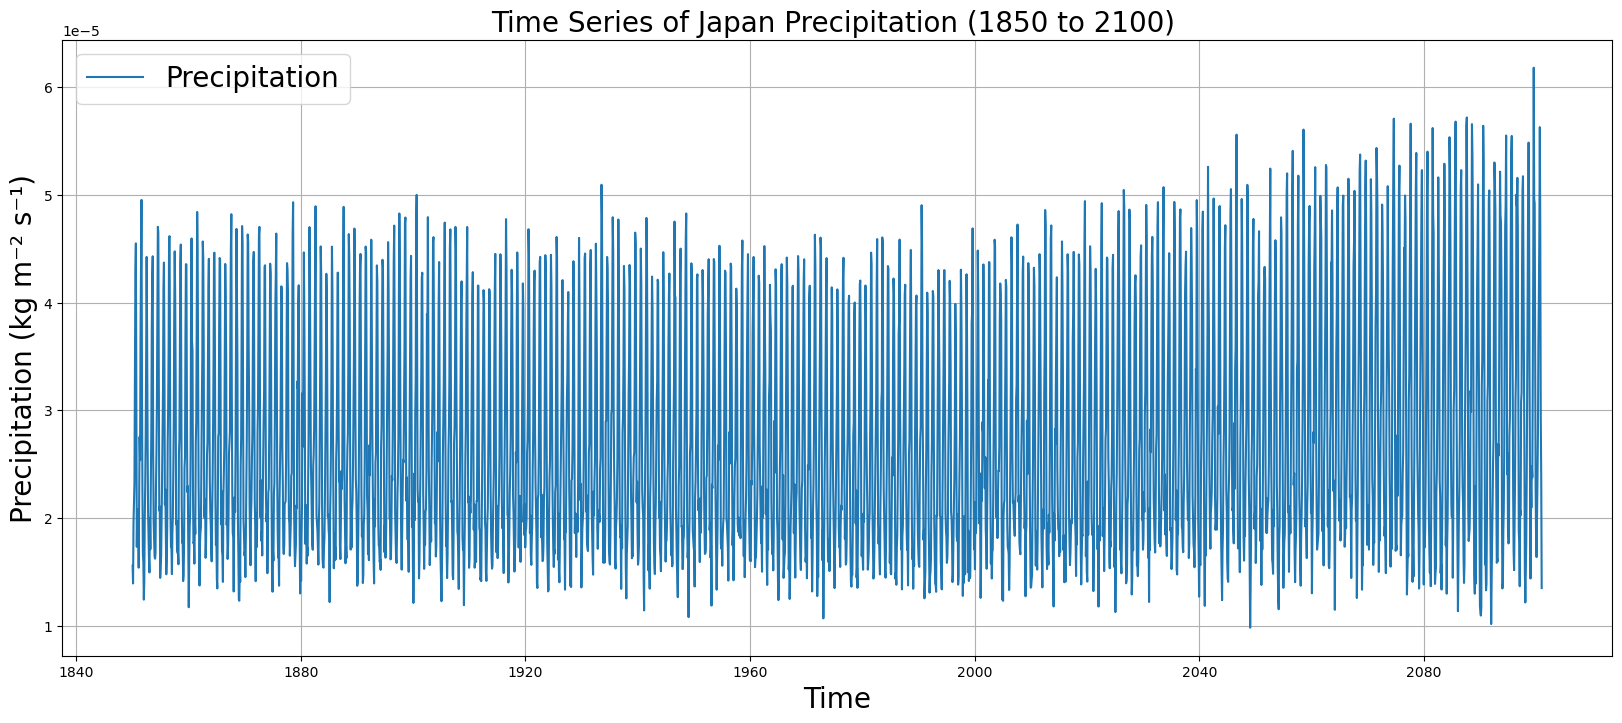

In [156]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, pr_cr.pr, label='Precipitation')
ax.set_title("Time Series of Japan Precipitation (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Precipitation (kg m⁻² s⁻¹)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

In [157]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
jp_sst_lat = (canesm5_sst_data.lat >= lat_min) & (canesm5_sst_data.lat <= lat_max)
jp_sst_lon = (canesm5_sst_data.lon >= lon_min) & (canesm5_sst_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
sst_jp = canesm5_sst_data.where(jp_sst_lat & jp_sst_lon, drop=True)

# Average over lat, lon dimensions to get a time series
sst_jp = sst_jp.mean(dim=["lat", "lon"])

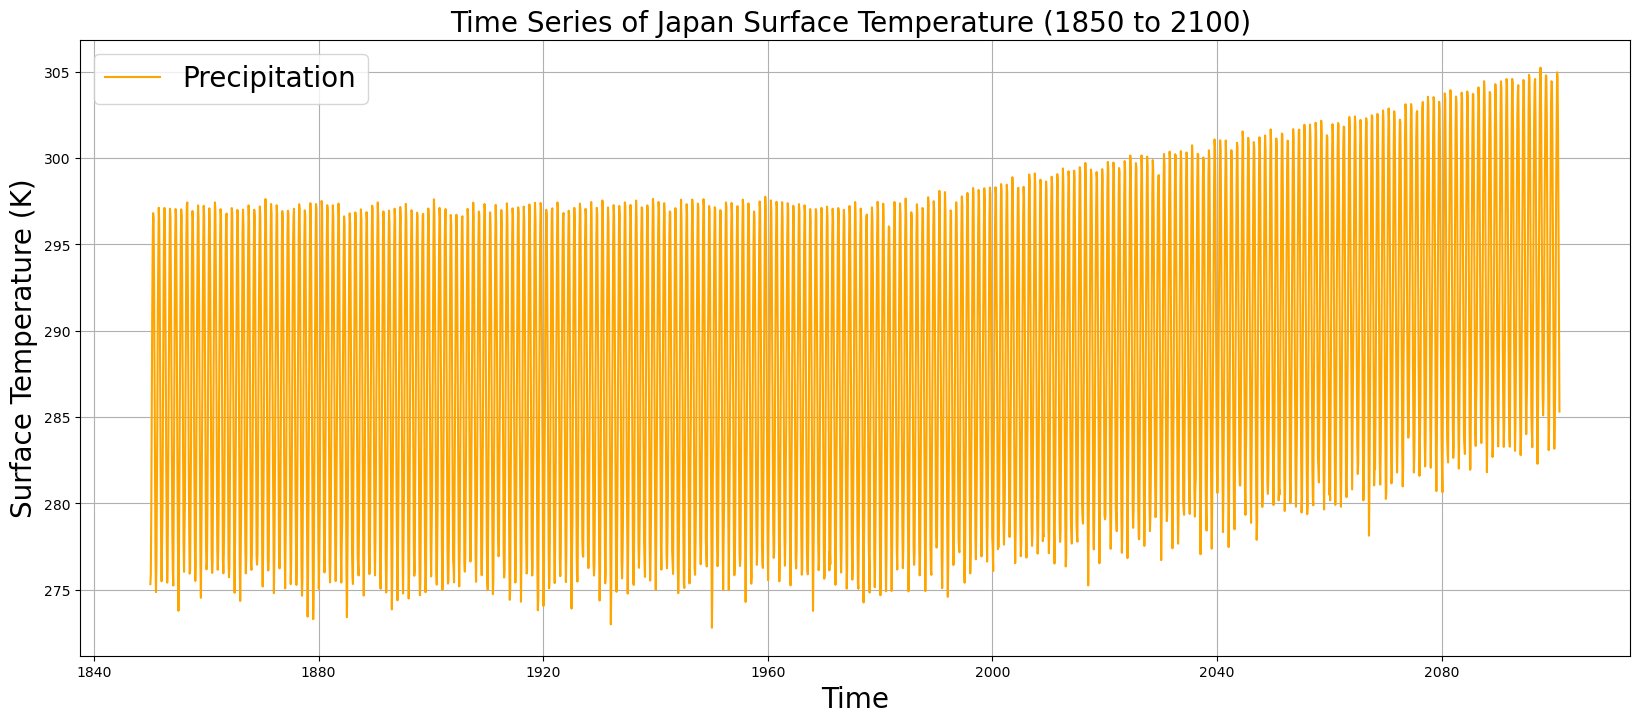

In [158]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, sst_jp.ts, label='Precipitation', color = 'orange')
ax.set_title("Time Series of Japan Surface Temperature (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Surface Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

## Weighted Average Regional Air Surface Temperature

### **Find a specific file**

Let's do an example of pulling the data we used in previous tutorials, this time from the cloud. The example data file from the [Time Series Plots](https://github.com/climate-datalab/Time-Series-Plots) and [Map Plots](https://github.com/climate-datalab/Map-Plots) repositories is:

`tas_Amon_CanESM5_historical_r10i1p1f1_gn_185001-201412.nc`

We can break this down to extract the fields we'll need to search the data catalog properly. If you need more detail on how to do this, also refer to the [filename decoder](http://climate-datalab.org/filename-decoder/) on the Climate DataLab website!

#### **Characteristics of this file (corresponding fields in the CMIP6 catalog are in parentheses)**:
- _Variable ("variable_id")_: This is a surface air temperature, or "tas", variable.
- _Realm ("table_id")_: Surface air temperature is generated by the atmosphere component of a climate model ("A"), and the information in this particular file is averaged monthly ("mon").
- _Model ("source_id")_: The name of the model is "CanESM5", which is short for the Canadian Earth System Model version 5.
- _Experiment ("experiment_id")_: The name of the model experiment being run. The file above is a _historical_ simulation: since we're also interested in the future projection information, we'll further specify that we'd also like the associated SSPs below.
- _Ensemble member ("member_id")_: The name of this ensemble member is "r10i1p1f1".
- _Grid_: This output is provided on the model's _native grid_ ("gn"), instead of doing any kind of interpolating to a different grid.

In [159]:
# Specify search terms to query catalog for CanESM5 data
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id = ['CanESM5']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id = 'r10i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon' 

# variable_id: which climate variable do you want? Here we want surface air temperature
variable_id = 'tas' 

In [160]:
# Search through catalog, store results in "res" variable
res2 = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res2.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,ScenarioMIP,CCCma,CanESM5,ssp585,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
2,ScenarioMIP,CCCma,CanESM5,ssp370,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
3,ScenarioMIP,CCCma,CanESM5,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
4,ScenarioMIP,CCCma,CanESM5,ssp245,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


In [161]:
# Read in just the historical data file
hist_data = xr.open_zarr(res2.df['zstore'][0], storage_options={'anon': True})

# Read in the SSP370 data file
ssp370_data2 = xr.open_zarr(res2.df['zstore'][2], storage_options={'anon': True})

# concat both
# Concatenate historical and future projection data
hist_fut_data = xr.concat([hist_data, ssp370_data2], dim="time")

In [162]:
# Store tas xarray
tas = hist_fut_data['tas']

In [163]:
print(tas)

<xarray.DataArray 'tas' (time: 3012, lat: 64, lon: 128)>
dask.array<concatenate, shape=(3012, 64, 128), dtype=float32, chunksize=(600, 64, 128), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        ST+273.16, CMIP_table_comment: near-surface (usually, 2 m...
    history:        degctok 2019-04-30T17:40:12Z altered by CMOR: Treated sca...
    long_name:      Near-Surface Air Temperature
    original_name:  ST
    standard_name:  air_temperature
    units:          K


In [164]:
# Define min/max bounds for region of interest (Japan)
lat_min, lat_max = 20.2145811, 45.7112046
lon_min, lon_max = 45.7112046, 154.205541

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_jp_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_jp_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_jp = tas.where(tas_jp_lat & tas_jp_lon, drop=True)

# Do a spatial average over the region by averaging over lat, lon dimensions
tas_jp = tas_jp.mean(dim=['lat','lon'])

In [165]:
tas

<xarray.DataArray 'tas' (time: 3012, lat: 64, lon: 128)>
dask.array<concatenate, shape=(3012, 64, 128), dtype=float32, chunksize=(600, 64, 128), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        ST+273.16, CMIP_table_comment: near-surface (usually, 2 m...
    history:        degctok 2019-04-30T17:40:12Z altered by CMOR: Treated sca...
    long_name:      Near-Surface Air Temperature
    original_name:  ST
    standard_name:  air_temperature
    units:          K

In [166]:
# Print time range of the data
print(tas_jp.time.values.min(), tas_jp.time.values.max())

1850-01-16 12:00:00 2100-12-16 12:00:00


In [167]:
# Print datatype of the time
print(tas_jp.time.dtype)

object


In [168]:
# Logical mask for time periods
tas_jp = tas_jp.sel(time=(tas_jp.time >= cftime.DatetimeNoLeap(1850, 1, 1)) & 
                           (tas_jp.time <= cftime.DatetimeNoLeap(2015, 12, 31)))

In [169]:
print(tas_jp)

<xarray.DataArray 'tas' (time: 1992)>
dask.array<getitem, shape=(1992,), dtype=float32, chunksize=(600,), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * time     (time) object 1850-01-16 12:00:00 ... 2015-12-16 12:00:00


In [170]:
# Calculate annual mean
annual_mean = tas_jp.groupby('time.year').mean()

## Convert to Celsius

In [171]:
annual_mean = annual_mean - 273.15

## Calculate line of best fit

In [172]:
# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x = np.polyfit(annual_mean.year, annual_mean, 1)

# Generate a polynomial object using those best-fit parameters
trend_line = np.poly1d(x)  

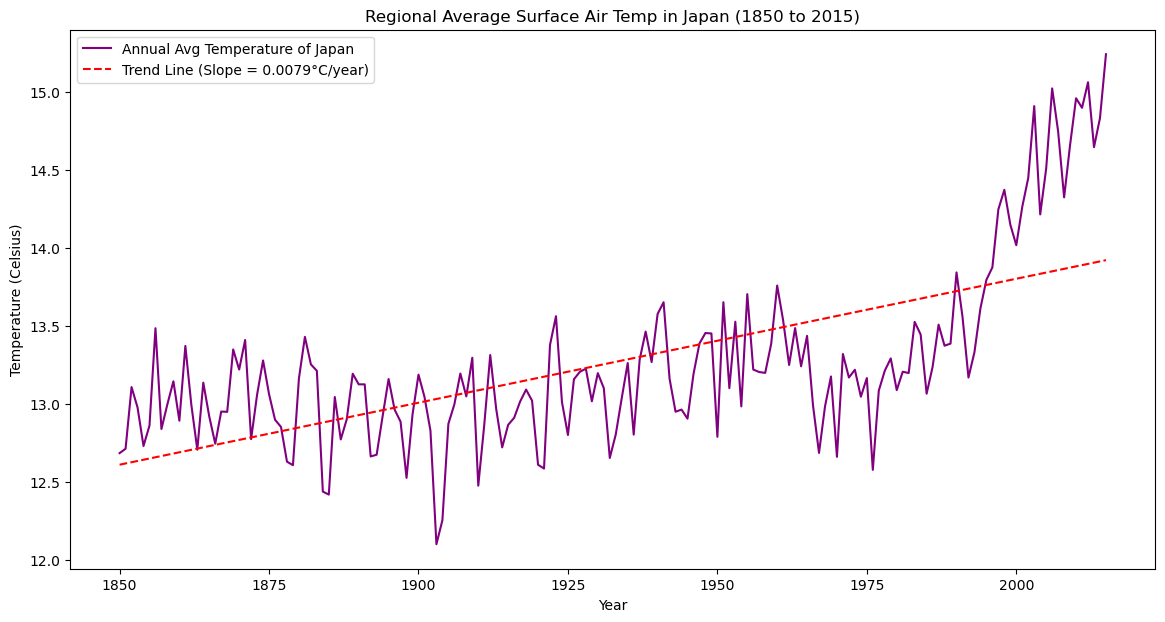

In [173]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(annual_mean.year, annual_mean, label= 'Annual Avg Temperature of Japan', color='purple')
ax.plot(annual_mean.year, trend_line(annual_mean.year), color='red', linestyle='--', label=f'Trend Line (Slope = {x[0]:.4f}°C/year)')
ax.set_title('Regional Average Surface Air Temp in Japan (1850 to 2015)')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (Celsius)')
ax.legend()
plt.show()

## Repeat process for future trends

In [174]:
# Define min/max bounds for region of interest (Japan)
lat_min, lat_max = 20.2145811, 45.7112046
lon_min, lon_max = 45.7112046, 154.205541

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_jp_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_jp_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_jp = tas.where(tas_jp_lat & tas_jp_lon, drop=True)

# Do a spatial average over the region by averaging over lat, lon dimensions
tas_jp = tas_jp.mean(dim=['lat','lon'])

In [175]:
# Logical mask for time periods
tas_jp2 = tas_jp.sel(time=(tas_jp.time >= cftime.DatetimeNoLeap(1850, 1, 1)) & 
                           (tas_jp.time <= cftime.DatetimeNoLeap(2100, 12, 31)))

In [176]:
# Calculate annual mean
annual_mean_future = tas_jp2.groupby('time.year').mean()

In [177]:
# Convert to celsius
annual_mean_future = annual_mean_future - 273.15

In [178]:
# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x2 = np.polyfit(annual_mean_future.year, annual_mean_future, 1)

# Generate a polynomial object using those best-fit parameters
trend_line2 = np.poly1d(x2)  

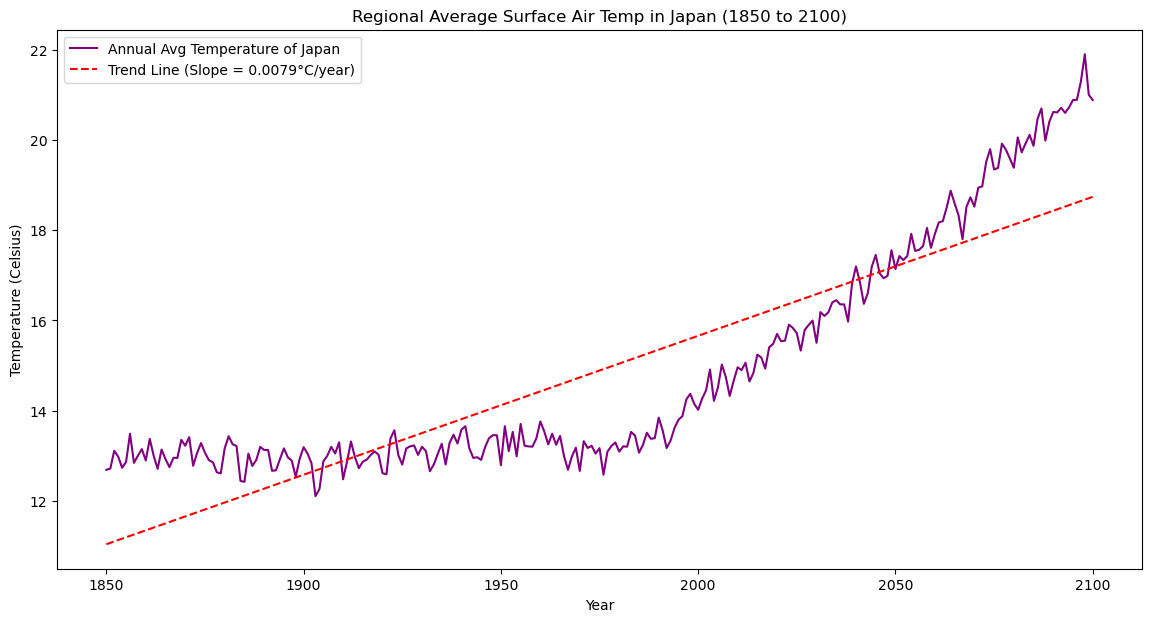

In [179]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(annual_mean_future.year, annual_mean_future, label= 'Annual Avg Temperature of Japan', color='purple')
ax.plot(annual_mean_future.year, trend_line2(annual_mean_future.year), color='red', linestyle='--', label=f'Trend Line (Slope = {x[0]:.4f}°C/year)')
ax.set_title('Regional Average Surface Air Temp in Japan (1850 to 2100)')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (Celsius)')
ax.legend()
plt.show()

# Results and Reflections

Looking at each of these climate models, we can see that there is an overall increase in trends for precipitation, surface (atmospheric skin) temperature, and surface air temperature in Japan. For precipitation, it appears to reach up to 6 kg m⁻² s⁻¹ in 2100, which is a stark increase from the current average. The results of the surface temperature for Japan were also quite jarring, as it appears to increase exponentially from the historical plateau that seems to have ended in the 2000s. This refers to the "hypothetical thin layer high in the atmosphere that is transparent to incident solar radiation and partially absorbing of infrared radiation from the planet" [Wikipedia](https://en.wikipedia.org/wiki/Skin_temperature_(atmosphere). Looking at the historical plot of surface air temperature, we can see some variation along the trendlines and a spike in regional temperatures also in the 2000s. This is a smaller snapshot of the historical plus future climate model, where we see more historical variation and a significant increase above the trendline around year 2050. 

These drastic changes will inevitably impact livelihoods through increased precipitation and hotter temperatures. Japan produces many agricultural crops including rice, corn, wheat, soybeans, and more, which will likely be impacted by these climatic changes. This may also result in increased flooding, which will negatively impact both humans and ecosystems. This will lead to many species migrating and shfiting ranges, furthering the feedback loop of habitat disturbance and interspecies competition. 